In [40]:
import tensorflow as tf
import numpy
import json

In [2]:
!wget https://github.com/rom1504/minecraft-schematics-dataset/raw/gh-pages/good_small.tfrecord.gz

--2021-01-16 00:30:06--  https://github.com/rom1504/minecraft-schematics-dataset/raw/gh-pages/good_small.tfrecord.gz
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rom1504/minecraft-schematics-dataset/gh-pages/good_small.tfrecord.gz [following]
--2021-01-16 00:30:07--  https://raw.githubusercontent.com/rom1504/minecraft-schematics-dataset/gh-pages/good_small.tfrecord.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6461663 (6.2M) [application/octet-stream]
Saving to: ‘good_small.tfrecord.gz’

good_small.tfrecord 100%[===================>]   6.16M  25.3MB/s    in 0.2s    

2021-01-16 00:30:08 (25.3

In [37]:
!wget https://gitlab.com/rom1504/minecraft-schematics-dataset/-/raw/master/schematicsWithFinalUrl.json


--2021-01-16 00:55:42--  https://gitlab.com/rom1504/minecraft-schematics-dataset/-/raw/master/schematicsWithFinalUrl.json
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘schematicsWithFinalUrl.json’

schematicsWithFinal     [   <=>              ]  66.95M   132MB/s    in 0.5s    

2021-01-16 00:55:43 (132 MB/s) - ‘schematicsWithFinalUrl.json’ saved [70198347]



In [43]:
schematicData = json.load(open("schematicsWithFinalUrl.json"))

In [52]:
schematicData[0]

{'bigImgs': ['https://static.planetminecraft.com/files/image/minecraft/project/2020/280/13655774_l.jpg',
  'https://static.planetminecraft.com/files/image/minecraft/project/2020/280/13655775_l.jpg'],
 'comments': 0,
 'date': '2020-11-24T18:01:51-05:00',
 'description': 'this is a free 3x3 f home',
 'diamondCount': 2,
 'downloadLink': 'https://www.planetminecraft.com/project/3x3-f-home-ocean/download/schematic/',
 'downloads': 3,
 'favorites': 1,
 'finalDownloadLink': 'https://static.planetminecraft.com/files/resource_media/schematic/ocean-3x3-f-home.schematic',
 'img': 'https://static.planetminecraft.com/files/image/minecraft/project/2020/280/13655774_m.jpg',
 'subtitle': '3D Art Map',
 'tags': ['3d Art'],
 'title': '3x3 f home ocean',
 'url': 'https://www.planetminecraft.com/project/3x3-f-home-ocean/',
 'user': '956ms',
 'views': 69}

In [56]:
urlToData = {d['url']:d for d in schematicData}

In [49]:
allTags = set()

for d in schematicData:
  for tag in d['tags']:
    allTags.add(tag)


In [50]:
len(allTags)

25614

In [3]:
# Create a description of the features.
feature_description = {
    'url': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'schematicData': tf.io.FixedLenFeature([], tf.string, default_value=''),
}

def _parse_function(example_proto):
  # Parse the input `tf.train.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)

In [4]:
filenames = ["good_small.tfrecord.gz"]
raw_dataset = tf.data.TFRecordDataset(filenames, compression_type="GZIP")
raw_dataset


<TFRecordDatasetV2 shapes: (), types: tf.string>

In [5]:
for raw_record in raw_dataset.take(10):
  print(len(repr(raw_record)))

261754
259509
261801
261584
261953
261942
260855
262159
261816
261814


In [51]:
c = 0
for raw_record in raw_dataset:
  c+=1
print(c)

8328


In [6]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

<MapDataset shapes: {schematicData: (), url: ()}, types: {schematicData: tf.string, url: tf.string}>

In [53]:
def f(a, url):
    return [numpy.frombuffer(a.numpy(), numpy.int16).reshape([32,32,32]), url]

ds = parsed_dataset.map(lambda x: tf.py_function(f, [x['schematicData'], x['url']], [tf.int16,tf.string]))

{
  "bigImgs": [
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/847/13655125_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/847/13655128_l.jpg"
  ],
  "comments": 2,
  "date": "2020-11-24T15:09:50-05:00",
  "description": "a simple building i made recently. I hope you all enjoy :D",
  "diamondCount": 4,
  "downloadLink": "https://www.planetminecraft.com/project/medieval-cottagecore-buidling/download/schematic/",
  "downloads": 11,
  "favorites": 1,
  "finalDownloadLink": "https://static.planetminecraft.com/files/resource_media/schematic/buildin.schem",
  "img": "https://static.planetminecraft.com/files/image/minecraft/project/2020/847/13655125_m.jpg",
  "subtitle": "Land Structure Map",
  "tags": [
    "Land Structure",
    "Medeival",
    "Cottagecore"
  ],
  "title": "Medieval Cottagecore Buidling",
  "url": "https://www.planetminecraft.com/project/medieval-cottagecore-buidling/",
  "user": "SiveNotFound",
  "views": 87


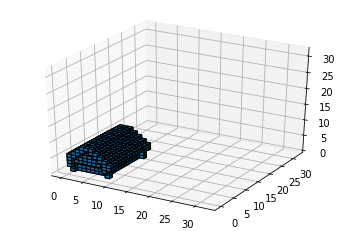

{
  "bigImgs": [
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/943/13654877_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/943/13654881_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/943/13654883_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/943/13654885_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/943/13654887_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/943/13654888_l.jpg"
  ],
  "comments": 2,
  "date": "2020-11-24T14:06:26-05:00",
  "description": "Howdy! This is a Medieval build that could be used as a house, or a shop, or a cottage and it has landscaping included. Of course this is customizable, there is no need to build around it. I haven't built an interior and you can let your mind run wild on that! This was made in version 1.16.4 but it uses blocks from 1.14+. If yo

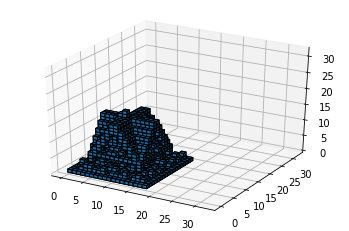

{
  "bigImgs": [
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/212/13652771_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/212/13652750-youtubethumbnail_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/212/13652753_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/212/13652754_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/212/13652758_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/212/13652759_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/212/13652760_l.jpg"
  ],
  "comments": 2,
  "date": "2020-11-23T21:55:18-05:00",
  "description": "A witch hut transformed using crimson blocks. Build is true to vanilla design and has minimal changes to original structure.\ud83c\udf3c VERSION\u2022 Java Edition 1.16.4\ud83c\udf3c SHADER\u2022 BSL Shader\ud83c\udf

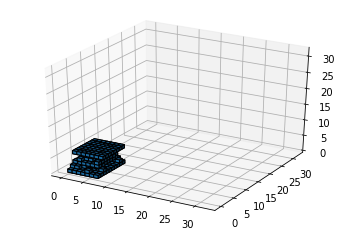

{
  "bigImgs": "https://static.planetminecraft.com/files/image/minecraft/project/2020/702/13642721_l.jpg",
  "comments": 0,
  "date": "2020-11-21T09:30:17-05:00",
  "description": "",
  "diamondCount": 5,
  "downloadLink": "https://www.planetminecraft.com/project/tie-predator/download/schematic/",
  "downloads": 12,
  "favorites": 4,
  "finalDownloadLink": "https://static.planetminecraft.com/files/resource_media/schematic/tie-predator.schem",
  "img": "https://static.planetminecraft.com/files/image/minecraft/project/2020/702/13642721_m.jpg",
  "subtitle": "Air Structure Map",
  "tags": [
    "Air Structure"
  ],
  "title": "Tie Predator",
  "url": "https://www.planetminecraft.com/project/tie-predator/",
  "user": "DepthCharger",
  "views": 142
}


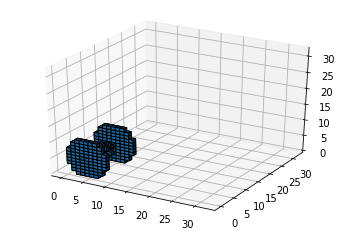

{
  "bigImgs": [
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/201/13646976-screenshot_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/201/13646977-screenshot_l.jpg",
    "https://static.planetminecraft.com/files/image/minecraft/project/2020/201/13646978-screenshot_l.jpg"
  ],
  "comments": 1,
  "date": "2020-11-22T11:56:50-05:00",
  "description": "IS-2 Schematic (1:1) If you want to use it somewhere anywhere just credit me or DM me on Discord Captain Slav1#9569:D",
  "diamondCount": 1,
  "downloadLink": "https://www.planetminecraft.com/project/is-2-schematic-1-1/download/schematic/",
  "downloads": 2,
  "favorites": 0,
  "finalDownloadLink": "https://static.planetminecraft.com/files/resource_media/schematic/is-2.schem",
  "subtitle": "3D Art Map",
  "tags": [
    "3d Art",
    "Schematic",
    "Schem"
  ],
  "title": "IS-2 Schematic (1:1)",
  "url": "https://www.planetminecraft.com/project/is-2-schematic-1-1/",
  "user":

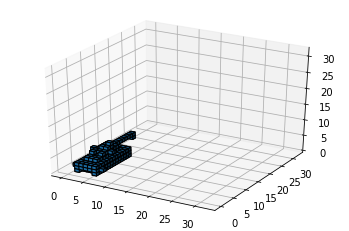

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

for a in ds.take(5):
  print(json.dumps(urlToData[a[1].numpy().decode('utf8')], indent=2, sort_keys=True))
  fig = plt.figure()
  ax = fig.gca(projection='3d')

  ax.voxels(numpy.swapaxes(a[0].numpy(), 1, 2), edgecolor="k")
  plt.show()



'https://www.planetminecraft.com/project/medieval-cottagecore-buidling/'

In [33]:
a

(<tf.Tensor: shape=(32, 32, 32), dtype=int16, numpy=
 array([[[   0,    0,    0, ...,    0,    0,    0],
         [   0,    0, 3910, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0],
         ...,
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0]],
 
        [[   0, 8389, 8391, ...,    0,    0,    0],
         [   0, 5019, 9455, ...,    0,    0,    0],
         [   0, 4190, 7863, ...,    0,    0,    0],
         ...,
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0]],
 
        [[   0,    0, 7861, ...,    0,    0,    0],
         [   0, 7811, 9455, ...,    0,    0,    0],
         [   0, 7883, 7799, ...,    0,    0,    0],
         ...,
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,    0,    0, ...,    0,    0,    0],
         [   0,